In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [7]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [11]:
## Data Loading and Pre-processing:
from tqdm import *
# Parameters
batch_size = 64
test_batch_size = 1000

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Data Loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=test_batch_size, shuffle=False)


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # added another hidden layer
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))  # added ReLU activation here
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Parameters
BATCH_SIZE = 64
EPOCHS = 10
LR = 0.001
MOMENTUM = 0.9
WEIGHT_DECAY = 0.01  # Regularization strength for both Adam and AdamW
HIDDEN_DIM = 128
INPUT_DIM = 28*28
OUTPUT_DIM = 10

# Load Data
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Training function
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

# Main
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM).to(device)

# Adam Optimizer with L2 regularization
optimizer_adam = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

# AdamW Optimizer
optimizer_adamw = optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

# Train using Adam with L2 regularization
for epoch in trange(1, EPOCHS + 1):
    train(model, device, train_loader, optimizer_adam, epoch)

# (Optional) Reset the model weights here if you want separate runs

# Train using AdamW
for epoch in trange(1, EPOCHS + 1):
    train(model, device, train_loader, optimizer_adamw, epoch)

# (Optional) Evaluation, plots, etc.


100%|██████████| 10/10 [00:25<00:00,  2.57s/it]


  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


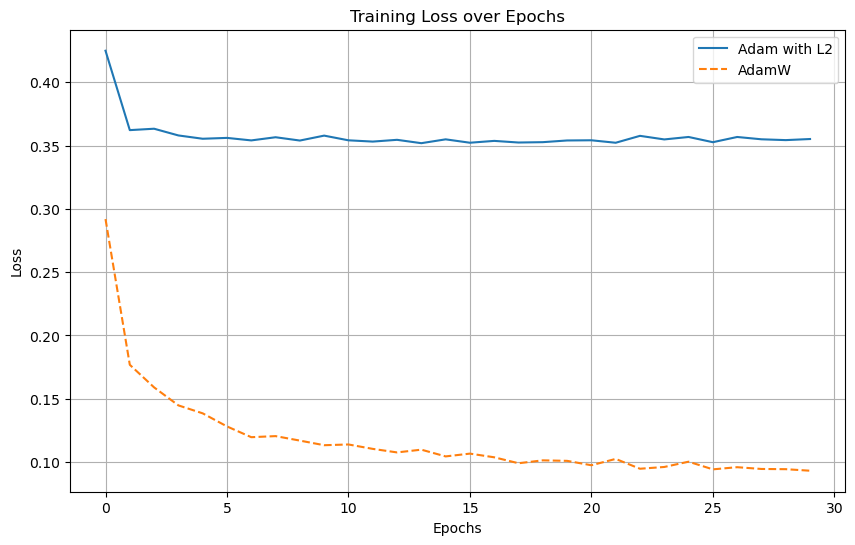

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Training function
def train(model, device, train_loader, optimizer):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# Plotting function
def plot_losses(adam_losses, adamw_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(adam_losses, label='Adam with L2', linestyle='-')
    plt.plot(adamw_losses, label='AdamW', linestyle='--')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
BATCH_SIZE = 64
EPOCHS = 30
LR = 0.01
WEIGHT_DECAY = 0.01
HIDDEN_DIM = 30
INPUT_DIM = 28*28
OUTPUT_DIM = 10

# Load Data
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Main
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM).to(device)

# Adam Optimizer with L2 regularization
optimizer_adam = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

# AdamW Optimizer
optimizer_adamw = optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

# Lists to store average loss per epoch
adam_losses = []
adamw_losses = []

# Train using Adam with L2 regularization
model_copy = SimpleNN(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM).to(device)  # Copy of the initial model weights
model_copy.load_state_dict(model.state_dict())

for epoch in trange(EPOCHS):
    
    loss = train(model, device, train_loader, optimizer_adam)
    adam_losses.append(loss)

# Load the original weights for training with AdamW
model.load_state_dict(model_copy.state_dict())

for epoch in trange(EPOCHS):
    loss = train(model, device, train_loader, optimizer_adamw)
    adamw_losses.append(loss)

plot_losses(adam_losses, adamw_losses)
